In [6]:
import os

dataset_path = "D:/ISL_dataset"

# List classes
classes = os.listdir(dataset_path)
print("Classes found:", classes)
print("Total classes:", len(classes))

Classes found: ['1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
Total classes: 35


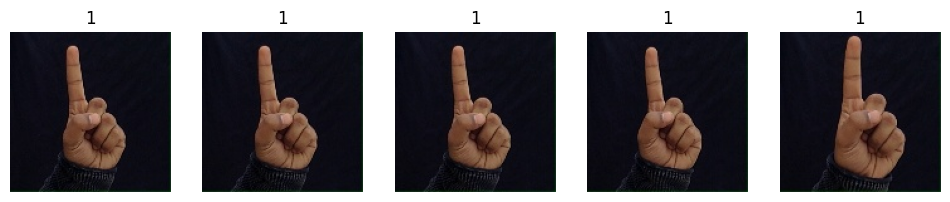

In [2]:
import matplotlib.pyplot as plt
import cv2

# Pick one class (e.g., first one)
sample_class = classes[0]
sample_dir = os.path.join(dataset_path, sample_class)

# Show first 5 images
sample_images = os.listdir(sample_dir)[:5]

plt.figure(figsize=(12, 6))
for i, img_name in enumerate(sample_images):
    img_path = os.path.join(sample_dir, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.axis("off")
    plt.title(sample_class)
plt.show()


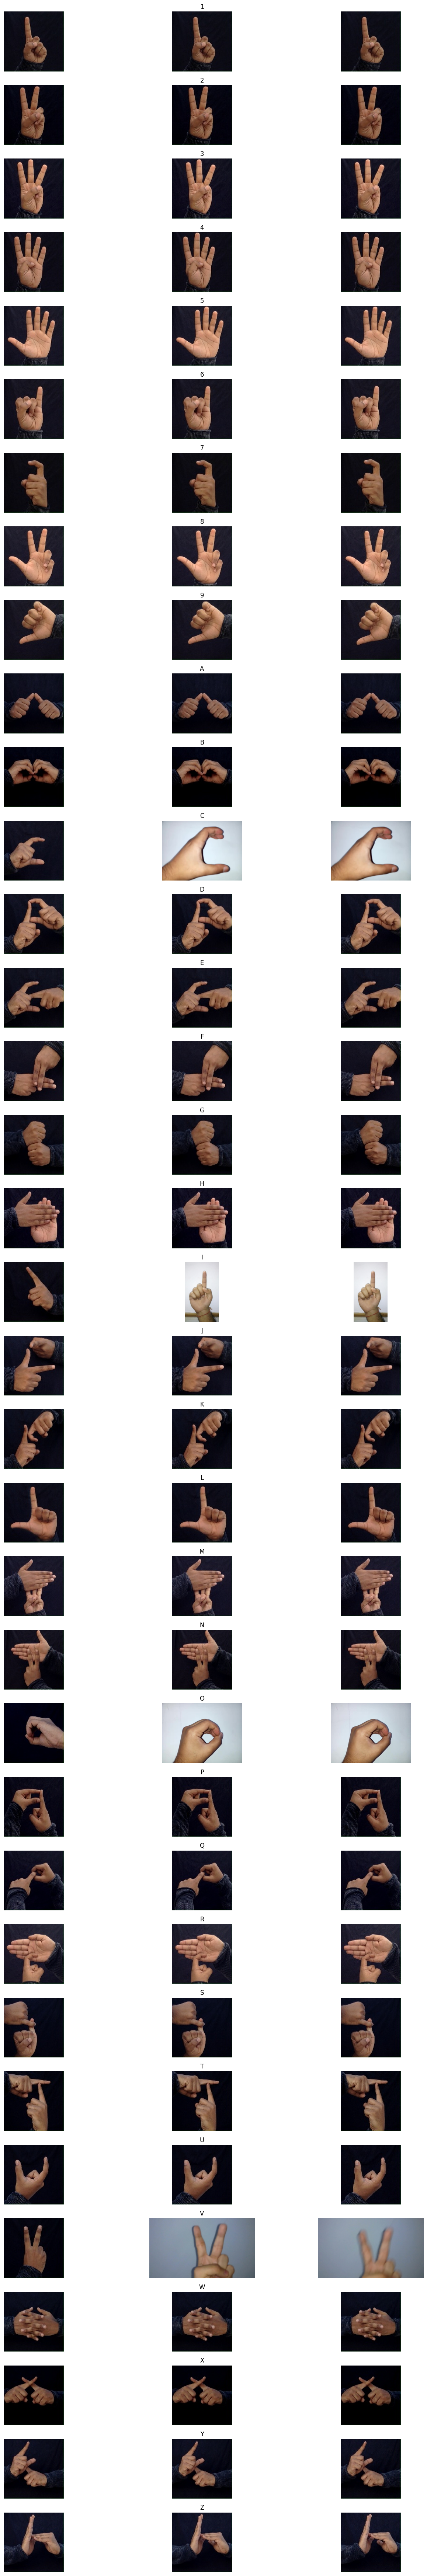

In [9]:
import matplotlib.pyplot as plt
import cv2
import os

dataset_path = "D:/ISL_dataset"
classes = os.listdir(dataset_path)

# Show 3 sample images per class
plt.figure(figsize=(15, len(classes) * 2))  

for i, class_name in enumerate(classes):
    sample_dir = os.path.join(dataset_path, class_name)
    sample_images = os.listdir(sample_dir)[:3]  # first 3 images

    for j, img_name in enumerate(sample_images):
        img_path = os.path.join(sample_dir, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(len(classes), 3, i * 3 + j + 1)
        plt.imshow(img)
        plt.axis("off")
        if j == 1:  # show label only once in the middle
            plt.title(class_name)

plt.tight_layout()
plt.show()


In [3]:
import tensorflow as tf

img_height, img_width = 64, 64
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)


Found 42745 files belonging to 35 classes.
Using 34196 files for training.
Found 42745 files belonging to 35 classes.
Using 8549 files for validation.


##datapreprocessing

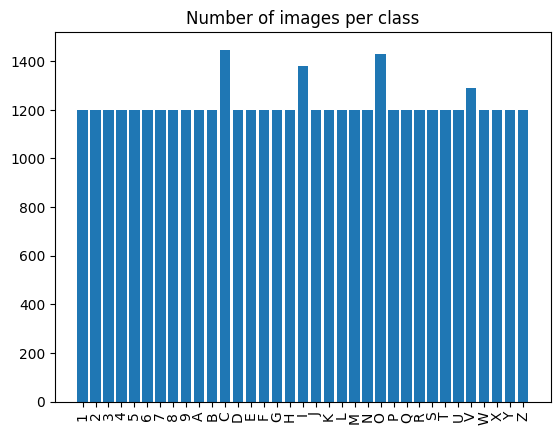

In [10]:
import os
import matplotlib.pyplot as plt

class_counts = {cls: len(os.listdir(os.path.join(dataset_path, cls))) for cls in classes}

plt.bar(class_counts.keys(), class_counts.values())
plt.xticks(rotation=90)
plt.title("Number of images per class")
plt.show()


In [11]:
import tensorflow as tf

img_height, img_width = 64, 64
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Normalize images to [0,1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))


Found 42745 files belonging to 35 classes.
Using 34196 files for training.
Found 42745 files belonging to 35 classes.
Using 8549 files for validation.


In [14]:
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
])


In [15]:
import cv2

for cls in classes:
    for img_name in os.listdir(os.path.join(dataset_path, cls)):
        img_path = os.path.join(dataset_path, cls, img_name)
        img = cv2.imread(img_path)
        if img is None:
            print(f"Corrupted image found: {img_path}")
